# Problem Set 2

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


In [ ]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import StandardScaler

warnings.filterwarnings(action="ignore")

In [ ]:
df = pd.read_csv("data\Pokemon.csv")

In [ ]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [ ]:
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [ ]:
df.shape

(721, 23)

In [ ]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [ ]:
len(df[(df['isLegendary'] == True)])

46

#1 There are 46 Legendary Pokemon

In [ ]:
df = df.set_index('Name')
df[('attack-HP ratio')] = df[('Attack')]/df[('HP')]
print("Pokemon with Max Attack-HP Ratio:",df[('attack-HP ratio')].argmax())

Pokemon with Max Attack-HP Ratio: Shedinja


#2 Pokemon with Max Attack-HP Ratio is Shedinja 

In [ ]:
df[["Type_1"]] = df['Type_1'].str.contains('Fire').astype(bool)

In [ ]:
df.dtypes

Number                int64
Type_1                 bool
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
attack-HP ratio     float64
dtype: object

In [ ]:
df[["Type_1"]]

,Type_1
Name,
Bulbasaur,False
Ivysaur,False
Venusaur,False
Charmander,True
Charmeleon,True
Charizard,True
Squirtle,False
Wartortle,False
Blastoise,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression()
logistic_model.fit(X, df[["Type_1"]])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df[["Type_1"]])
print(accuracy)

0.9348127600554785


In [ ]:
clf = LogisticRegression(random_state=0, class_weight='balanced')

model = clf.fit(X, df[['Type_1']])
predictions1 = model.predict(X)
accuracy1 = metrics.accuracy_score(predictions1,df[["Type_1"]])
print(accuracy1)

0.7018030513176144


#3&6 A binary classifier was created with the estimated accuracy of 0.9348

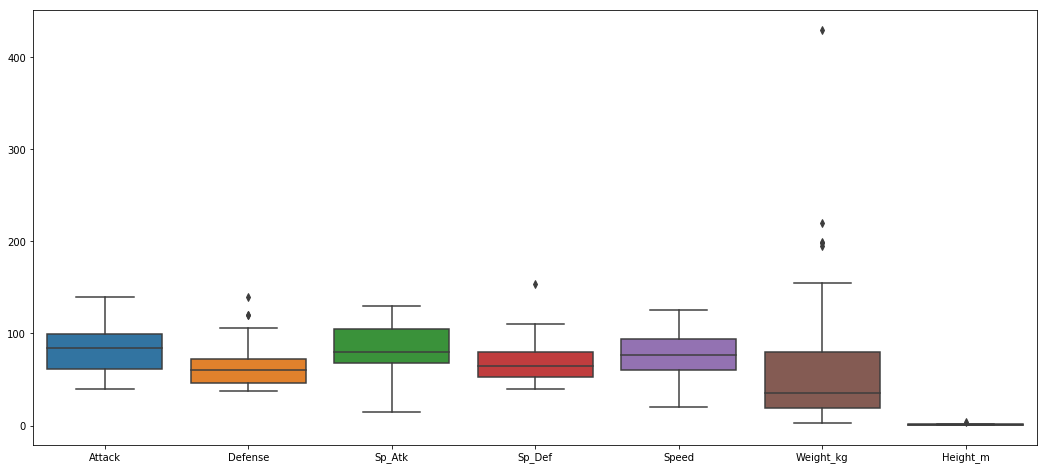

In [ ]:
plt.figure(figsize=(18,8))

df3 = df[(df["Type_1"] == True)]
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)

#4 Here is the boxplot of the characteristics of fire type pokemon.  

In [ ]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[["Type_1","pred", "prob"]]
selection.head()

,Type_1,pred,prob
Name,,,
Bulbasaur,False,False,0.068274
Ivysaur,False,False,0.059723
Venusaur,False,False,0.052397
Charmander,True,False,0.083832
Charmeleon,True,False,0.075077
